**Імпорт бібліотек**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Дані за варіантом**

Вибірка А

In [4]:
data_1 = np.array([
55, 60, 42, 43, 65,
30, 47, 47, 41, 52,
49, 44, 57, 61, 54,
50, 47, 57, 52, 40,
69, 47, 50, 58, 58,
59, 72, 47, 39, 39,
54, 57, 39, 57, 49,
57, 59, 39, 45, 33,
70, 64, 49, 48, 62,
52, 55, 55, 60, 46,
35, 54, 42, 34, 49,
35, 36, 49, 37, 38,
42, 48, 34, 54, 51,
70, 39, 44, 41, 41,
50, 62, 43, 47, 49])

Вибірка Б

In [5]:
data_2 = np.array([
61, 64, 47, 54, 63,
53, 62, 56, 52, 51,
64, 36, 43, 52, 49,
47, 40, 35, 61, 38,
40, 55, 49, 62, 64,
57, 43, 51, 42, 51,
50, 58, 50, 52, 42,
51, 49, 65, 56, 67,
56, 37, 63, 49, 32,
43, 59, 63, 50, 53,
52, 50, 68, 48, 47,
60, 43, 34, 51, 40,
45, 38, 37, 47, 47,
33, 51, 58, 56, 25,
67, 47, 64, 45, 54
])

Вибірка В

In [6]:
data_3 = np.array([
48, 57, 50, 53, 54,
31, 48, 55, 53, 60,
58, 63, 47, 42, 65,
53, 51, 43, 46, 57,
44, 53, 45, 54, 46,
52, 44, 40, 57, 45,
37, 53, 30, 33, 59,
50, 40, 39, 38, 45,
55, 57, 77, 44, 40,
46, 40, 28, 46, 43,
48, 46, 49, 55, 52,
47, 51, 36, 47, 56,
55, 50, 39, 43, 55,
49, 56, 44, 55, 59,
52, 36, 62, 49, 32
])

Вибірка Г

In [7]:
data_4 = np.array([
48, 29, 52, 55, 63,
67, 64, 44, 53, 69,
32, 53, 44, 36, 45,
49, 63, 53, 40, 45,
66, 41, 43, 60, 61,
45, 51, 58, 76, 48,
59, 42, 62, 39, 51,
60, 66, 71, 73, 61,
46, 48, 50, 37, 34,
55, 53, 42, 26, 69,
41, 51, 36, 53, 68,
56, 46, 50, 38, 47,
49, 48, 52, 61, 48,
39, 58, 39, 36, 57,
58, 50, 42, 41, 66
])

Вибірка Д

In [8]:
data_5 = np.array([
49, 44, 51, 70, 54,
50, 35, 48, 23, 52,
45, 29, 37, 66, 44,
52, 66, 31, 59, 44,
47, 45, 53, 56, 59,
42, 55, 51, 53, 58,
41, 30, 48, 54, 46,
50, 49, 62, 34, 35,
62, 41, 40, 38, 34,
63, 24, 41, 41, 46,
36, 64, 50, 67, 37,
48, 51, 54, 55, 28,
54, 47, 45, 57, 51,
46, 57, 50, 45, 54,
58, 35, 45, 65, 53
])

**Виконання лабораторної роботи**

In [21]:
def lab_execution(data):
    sorted_data = np.sort(data)
    unique, counts = np.unique(sorted_data, return_counts=True,)
    total_count = data.size
    relative_frequency = counts/total_count
    discrete_series = pd.DataFrame({'Значення':unique,'Частота':counts, 'Відносна частота':relative_frequency})
    print(f"Варіаційний ряд:\n {unique}")
    print(f"Дискретний розподіл вибірки:\n {discrete_series}")
    
    k = 5 * np.log10(total_count)
    #k = round(np.sqrt(total_count))
    
    h = round((max(sorted_data) -min(sorted_data))/k)
    
    bins = np.arange(min(sorted_data),max(sorted_data)+h,h)
    
    interval_series = {f"({bins[i]}, {bins[i+1]})":0 for i in range(len(bins)-1)}
    for value, count in zip(unique, counts):
        for i in range(len(bins) - 1):
            if bins[i] <= value < bins[i + 1]: # Перевіряємо в який інтервал попадає число
                interval_series[f"({bins[i]}, {bins[i+1]})"] += count # Враховуємо частоту
                break
            elif value == bins[i + 1]:
                if i + 2 < len(bins):
                    interval_series[f"({bins[i]}, {bins[i+1]})"] += count/2
                    next_interval = f"({bins[i + 1]}, {bins[i + 2]})"
                    if next_interval in interval_series: # Перевіряємо чи існує цей інтервал
                        interval_series[next_interval] += count / 2
                else:
    # Якщо це останній інтервал то записуємо частоту
                    interval_series[f"({bins[i]}, {bins[i + 1]})"] += count
                    break # Вихід з циклу після розділення частоти
    
    
    df = pd.DataFrame(list(interval_series.items()), columns=["Інтервал", "Частота"])
    new_intervals = []
    bin_edges = list(interval_series.keys())
    df["Відносна частота"] = df["Частота"] / (total_count * h)
    df["Кумулятивна частота"] = df["Частота"].cumsum()
    
    for i, interval in enumerate(bin_edges):
        left, right = interval.strip("()").split(",")
        if i == len(bin_edges)-1: # Якщо це останній інтервал
            new_intervals.append(f"({left}, {right}]") # Робимо (a, b]
        elif i == 0:
            new_intervals.append(f"[{left}, {right})") # Якщо це перший інтервал [a, b)
        else: # Залишаємо (a, b)
            new_intervals.append(f"({left}, {right})")
    
    df["Інтервал"] = new_intervals
    
    print(f"Інтегральний розподіл вибірки:\n {df}")
    
    #За даними експерименту знайти R ,Me та Mo
    # дискретний розподіл
    R = max(data) - min(data) # Розмах
    Me = np.median(data) # Медіана
    max_count = counts.max()
    Mo = unique[counts == max_count] # Мода
    print(f"\nДискретний розподіл вибірки:")
    print(f"Розмах (R): {R}")
    print(f"Медіана (Me): {Me}")
    print(f"Мода (Mo): {Mo}")
    
    # Інтегральний розподіл
    median_position = total_count / 2
    
    # Використовуємо стовпець "Кумулятивна частота" для визначення медіанного інтервалу
    median_interval_idx = df[df["Кумулятивна частота"] >= median_position].index[0]
    interval_str = df.loc[median_interval_idx, "Інтервал"]
    
    # Отримуємо нижню межу медіанного інтервалу
    # Використовуємо формат "[L, U)", тому прибираємо символи "[" та ")" та розділяємо по комі
    L = float(interval_str.strip("[]()").split(",")[0])
    f = df.loc[median_interval_idx, "Частота"]
    F = df.loc[median_interval_idx - 1, "Кумулятивна частота"] if median_interval_idx > 0 else 0
    
    # Формула для групованої медіани
    grouped_median = L + h * ((median_position - F) / f)
    
    # Групована мода
    # Знаходимо модальний інтервал (з максимальною частотою)
    modal_interval_idx = df["Частота"].idxmax()
    modal_interval_str = df.loc[modal_interval_idx, "Інтервал"]
    L_mode = float(modal_interval_str.strip("[]()").split(",")[0])
    f_mode = df.loc[modal_interval_idx, "Частота"]
    f_prev = df.loc[modal_interval_idx - 1, "Частота"] if modal_interval_idx > 0 else 0
    f_next = df.loc[modal_interval_idx + 1, "Частота"] if modal_interval_idx < len(df) - 1 else 0
    
    # Формула для групованої моди
    
    grouped_mode = L_mode + h * ((f_mode - f_prev) / ((2 * f_mode) - f_prev - f_next))
    print(f"\nІнтегральний розподіл вибірки:")
    print(f"Розмах (R): {R}")
    print(f"Медіана: {grouped_median:.2f}")
    print(f"Мода: {grouped_mode:.2f}")


    bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

    # Гістограма
    plt.figure(figsize=(10, 5))
    plt.bar(bin_centers, df["Відносна частота"], width=h, color="blue", edgecolor="black",
    alpha=0.85)
    plt.title("Гістограма щільності відносних частот інтервального ряду")
    plt.xlabel("Інтервали")
    plt.ylabel("Відносна частота")
    plt.grid(True)
    
    # Полігон частот (по дискретному ряду)
    plt.figure(figsize=(10, 5))
    plt.plot(unique, relative_frequency, marker='o', linestyle='-', color='b', label="Полігон частот")
    plt.title("Полігон частот")
    plt.xlabel("Значення")
    plt.ylabel("Відносна частота")
    plt.legend()
    plt.grid(True)
    
    mean_x = np.mean(data) # Середнє
    D = np.var(data, ddof=0) # Дисперсія
    std_x = np.std(data, ddof=0) # Стандартне відхилення
    V = (std_x / mean_x) * 100 # Коефіціент варіації
    
    print(f"\nСереднє (X̄): {mean_x:.2f}")
    print(f"Дисперсія (D): {D:.2f}")
    print(f"Коефіціент варіації (V): {V:.2f}%")

**Результати для вибірки А**

Варіаційний ряд:
 [30 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 54 55 57
 58 59 60 61 62 64 65 69 70 72]
Дискретний розподіл вибірки:
     Значення  Частота  Відносна частота
0         30        1          0.013333
1         33        1          0.013333
2         34        2          0.026667
3         35        2          0.026667
4         36        1          0.013333
5         37        1          0.013333
6         38        1          0.013333
7         39        5          0.066667
8         40        1          0.013333
9         41        3          0.040000
10        42        3          0.040000
11        43        2          0.026667
12        44        2          0.026667
13        45        1          0.013333
14        46        1          0.013333
15        47        6          0.080000
16        48        2          0.026667
17        49        6          0.080000
18        50        3          0.040000
19        51        1          0.013333
20     

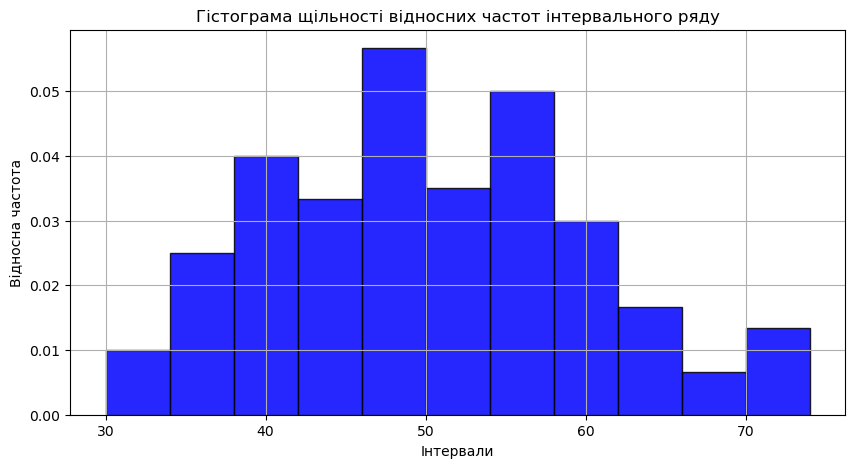

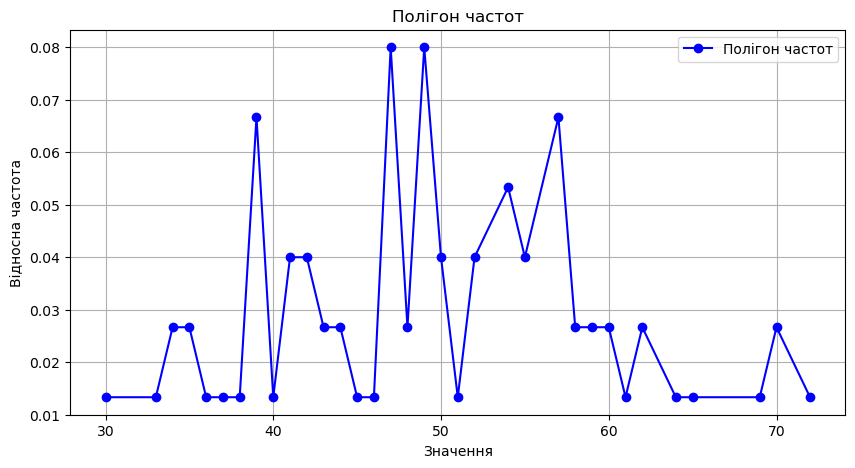

In [25]:
lab_execution(data_1)

**Результати для вибірки Б**

Варіаційний ряд:
 [25 32 33 34 35 36 37 38 40 42 43 45 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 67 68]
Дискретний розподіл вибірки:
     Значення  Частота  Відносна частота
0         25        1          0.013333
1         32        1          0.013333
2         33        1          0.013333
3         34        1          0.013333
4         35        1          0.013333
5         36        1          0.013333
6         37        2          0.026667
7         38        2          0.026667
8         40        3          0.040000
9         42        2          0.026667
10        43        4          0.053333
11        45        2          0.026667
12        47        6          0.080000
13        48        1          0.013333
14        49        4          0.053333
15        50        4          0.053333
16        51        6          0.080000
17        52        4          0.053333
18        53        2          0.026667
19        54        2          0.026667
20        

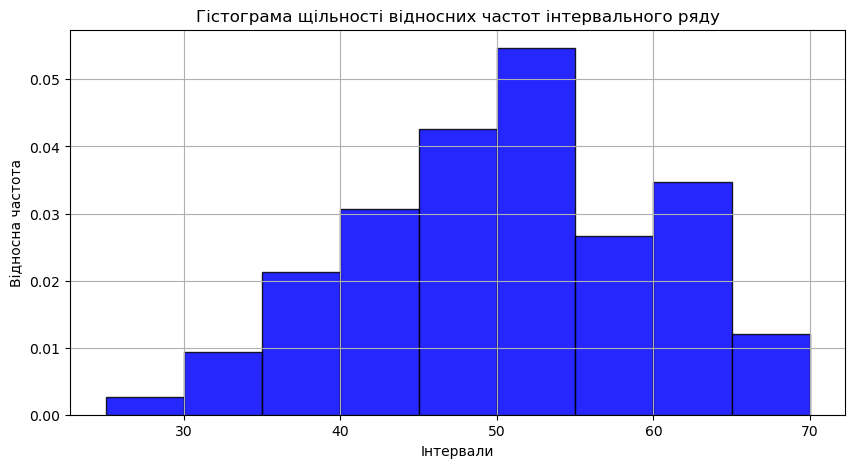

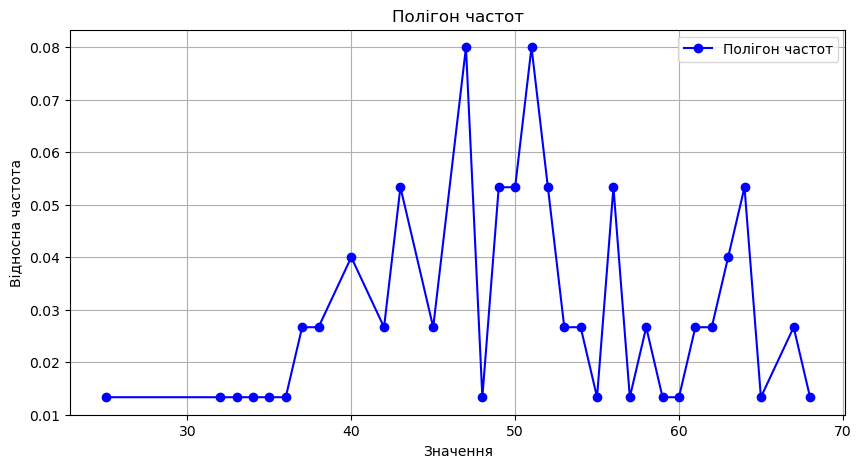

In [26]:
lab_execution(data_2)

**Результати для вибірки В**

Варіаційний ряд:
 [28 30 31 32 33 36 37 38 39 40 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 62 63 65 77]
Дискретний розподіл вибірки:
     Значення  Частота  Відносна частота
0         28        1          0.013333
1         30        1          0.013333
2         31        1          0.013333
3         32        1          0.013333
4         33        1          0.013333
5         36        2          0.026667
6         37        1          0.013333
7         38        1          0.013333
8         39        2          0.026667
9         40        4          0.053333
10        42        1          0.013333
11        43        3          0.040000
12        44        4          0.053333
13        45        3          0.040000
14        46        5          0.066667
15        47        3          0.040000
16        48        3          0.040000
17        49        3          0.040000
18        50        3          0.040000
19        51        2          0.026667
20        

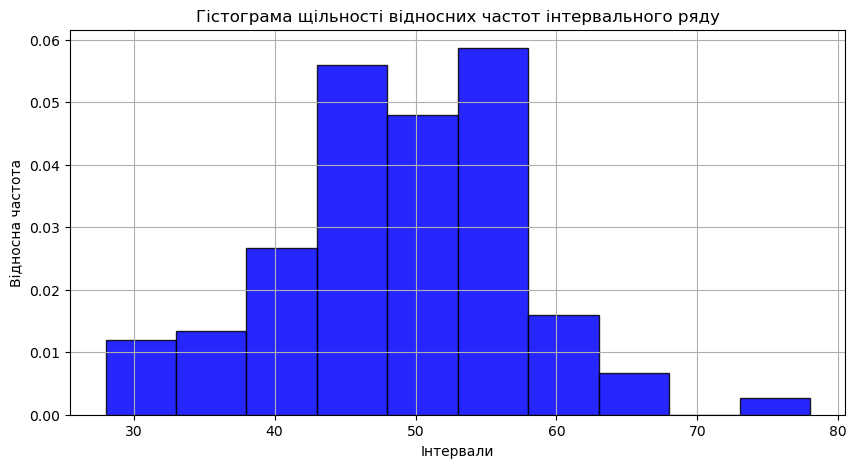

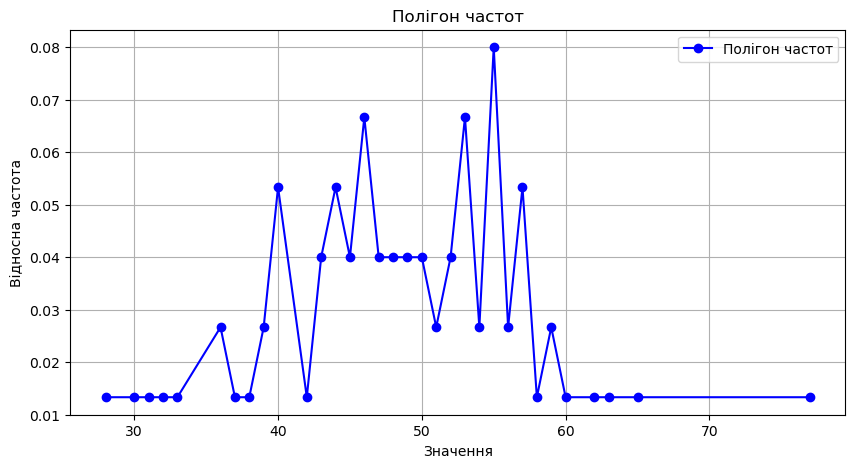

In [27]:
lab_execution(data_3)

**Результати для вибірки Г**

Варіаційний ряд:
 [26 29 32 34 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 55 56
 57 58 59 60 61 62 63 64 66 67 68 69 71 73 76]
Дискретний розподіл вибірки:
     Значення  Частота  Відносна частота
0         26        1          0.013333
1         29        1          0.013333
2         32        1          0.013333
3         34        1          0.013333
4         36        3          0.040000
5         37        1          0.013333
6         38        1          0.013333
7         39        3          0.040000
8         40        1          0.013333
9         41        3          0.040000
10        42        3          0.040000
11        43        1          0.013333
12        44        2          0.026667
13        45        3          0.040000
14        46        2          0.026667
15        47        1          0.013333
16        48        5          0.066667
17        49        2          0.026667
18        50        3          0.040000
19        51        3          0

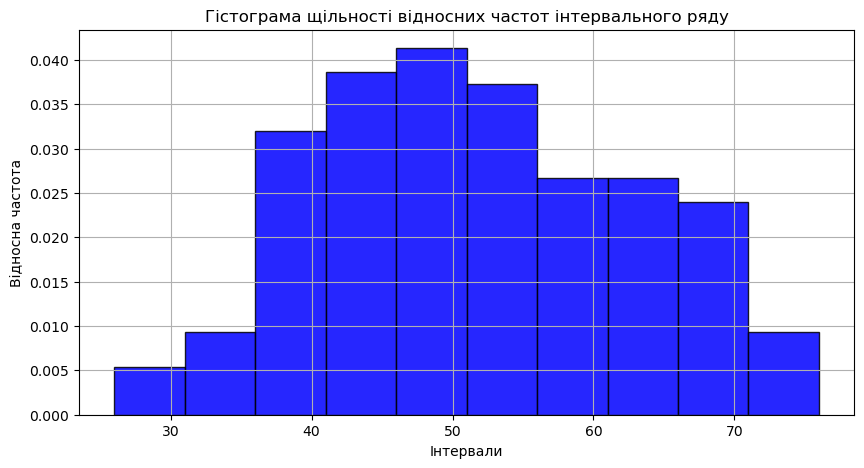

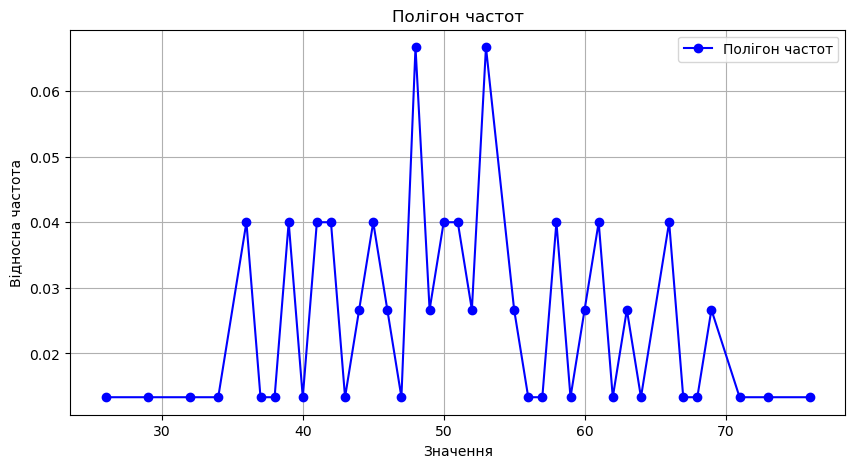

In [28]:
lab_execution(data_4)

**Результати для вибірки Д**

Варіаційний ряд:
 [23 24 28 29 30 31 34 35 36 37 38 40 41 42 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 62 63 64 65 66 67 70]
Дискретний розподіл вибірки:
     Значення  Частота  Відносна частота
0         23        1          0.013333
1         24        1          0.013333
2         28        1          0.013333
3         29        1          0.013333
4         30        1          0.013333
5         31        1          0.013333
6         34        2          0.026667
7         35        3          0.040000
8         36        1          0.013333
9         37        2          0.026667
10        38        1          0.013333
11        40        1          0.013333
12        41        4          0.053333
13        42        1          0.013333
14        44        3          0.040000
15        45        5          0.066667
16        46        3          0.040000
17        47        2          0.026667
18        48        3          0.040000
19        49        2          0.02666

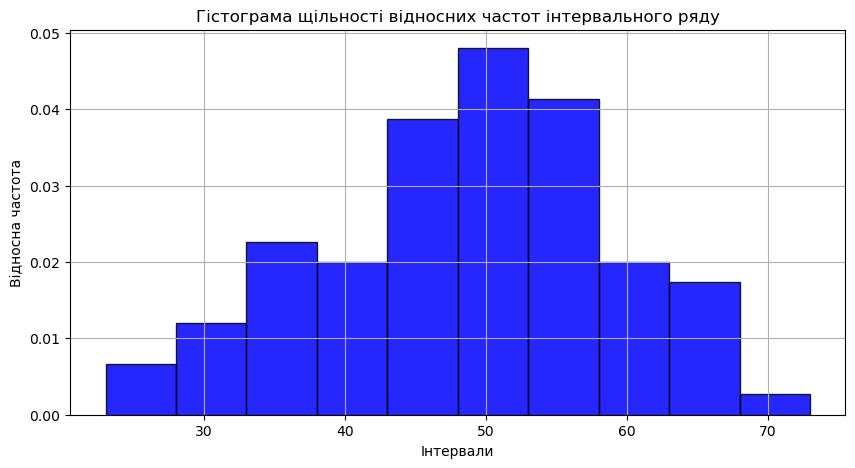

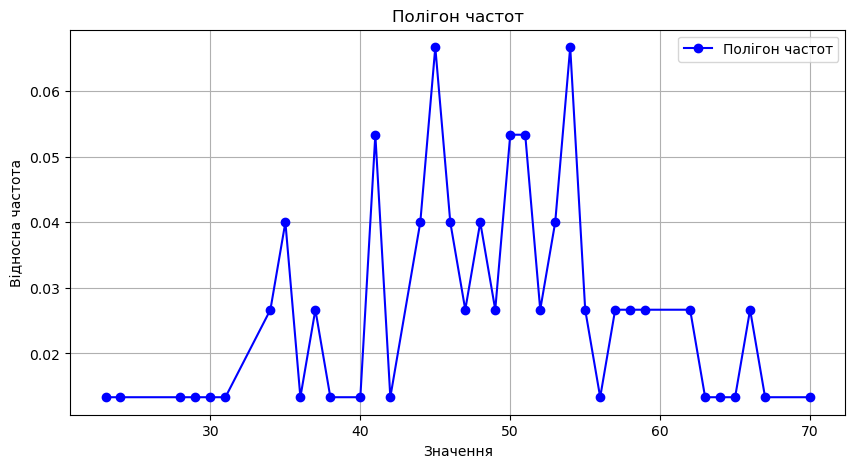

In [29]:
lab_execution(data_5)

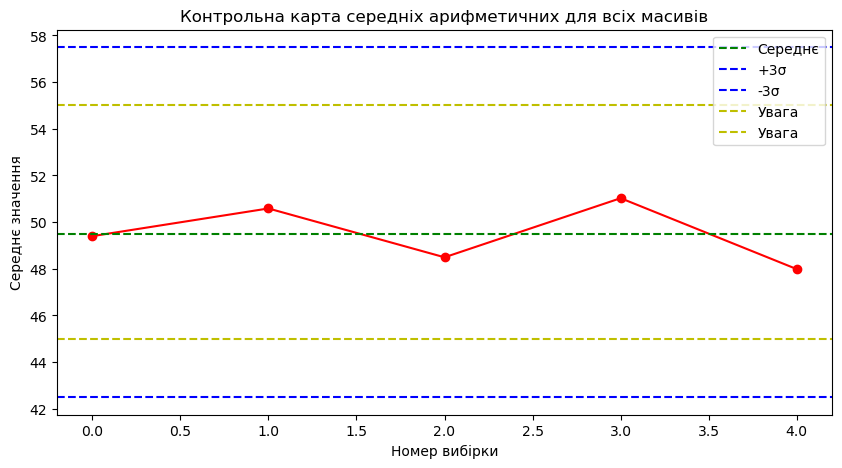

In [20]:
T_nom = 50
sigma_nom = 2.5

all_data = np.concatenate((data_1, data_2, data_3, data_4, data_5))

all_means = []
all_means.append(np.mean(data_1))
all_means.append(np.mean(data_2))
all_means.append(np.mean(data_3))
all_means.append(np.mean(data_4))
all_means.append(np.mean(data_5))

plt.figure(figsize=(10, 5))
plt.plot(all_means, marker='o', linestyle='-', color='r')
plt.axhline(y=np.mean(all_data), color='g', linestyle='--', label='Середнє')
plt.axhline(y=T_nom + 3 * sigma_nom, color='b', linestyle='--', label='+3σ')
plt.axhline(y=T_nom - 3 * sigma_nom, color='b', linestyle='--', label='-3σ')
plt.axhline(y=(T_nom + 3 * sigma_nom) - sigma_nom, color='y', linestyle='--', label='Увага')
plt.axhline(y=(T_nom - 3 * sigma_nom) + sigma_nom, color='y', linestyle='--', label='Увага')
plt.xlabel("Номер вибірки")
plt.ylabel("Середнє значення")
plt.title("Контрольна карта середніх арифметичних для всіх масивів")
plt.legend()
plt.show()